# MARVEL HERO'S ID SEARCH BY NAME

用英雄名字的关键字搜索英雄的id并使用id查询英雄的相关events。

In [4]:
from imp import reload #用于重新加载模块的库
import marvel #这是一个用来专门生成marvel apikey的自定义模块
import requests
from IPython.display import Image
#import time
from hashlib import md5
import json
import os
import re
from pprint import pprint
#reload(marvelkey) #调试模块时需要重新加载模块

marvel.pbkey = 'b429b36ad9c859671f28487a8acdca22'
marvel.pvkey = '10486b67a96262c7c4859f963ae11c36d94352e6'


In [6]:
hero_name = input('Search for :')
search_result = False
with open('hero_dict_n.txt','r') as hero_dict:
    
    hero_dict_j = json.loads(hero_dict.read())
    
    for keys in hero_dict_j['heros_id']:
        #不区分大小写，将re.IGNORECASE传递到search的标志参数
        if re.search(r'.*'+hero_name+'.*',keys['name'],re.IGNORECASE):   
            search_result = True
            print(keys['id'],keys['name'])
if not search_result:
    print('Oops,there is nothing here.')
   

Search for : Cap


1011276 Cap'n Oz
1009220 Captain America
1010914 Captain America (House of M)
1017295 Captain America (LEGO Marvel Super Heroes)
1017327 Captain America (Marvel War of Heroes)
1017575 Captain America (Sam Wilson)
1010913 Captain America (Ultimate)
1017105 Captain America/Steve Rogers (MAA)
1009223 Captain Britain
1010915 Captain Britain (Ultimate)
1011190 Captain Cross
1011196 Captain Flint
1010338 Captain Marvel (Carol Danvers)
1011096 Captain Marvel (Genis-Vell)
1009224 Captain Marvel (Mar-Vell)
1011095 Captain Marvel (Monica Rambeau)
1011097 Captain Marvel (Phyla-Vell)
1011355 Captain Midlands
1009225 Captain Stacy
1011027 Captain Universe
1010714 The Captain


Hero's ID: 1010801


Searching for events......

Events found: 2
Events got: 2 



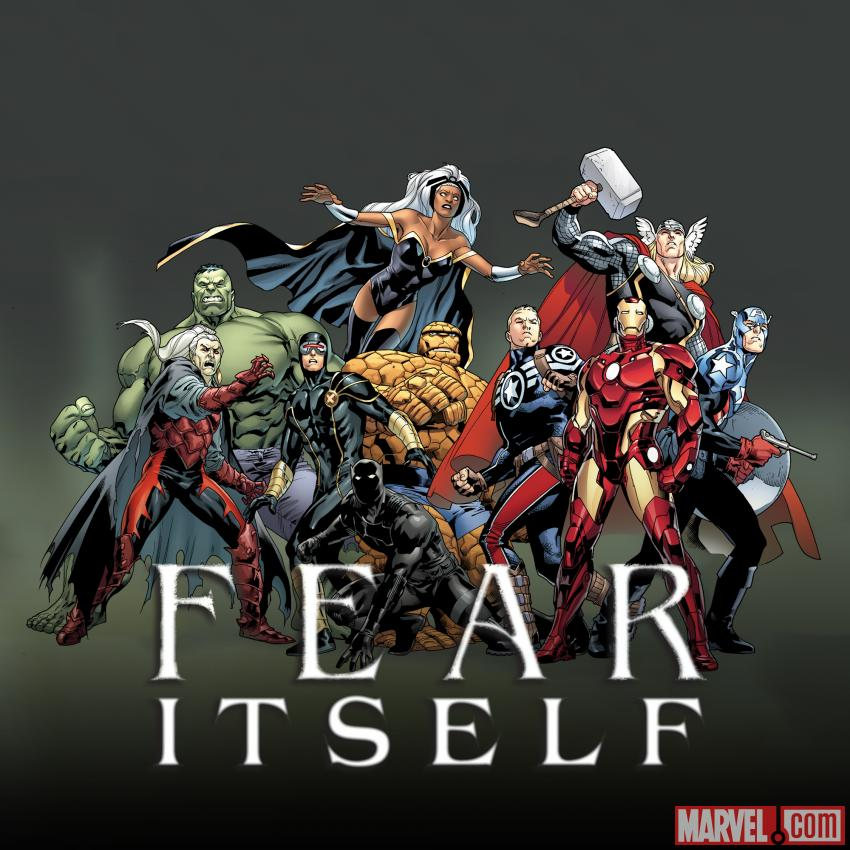

title: Fear Itself 
 id: 302 
 Description: The Serpent, God of Fear and brother to the Allfather Odin, rises to challenge Earthâ€™s Mightiest in a seven-issue event written by Matt Fraction with art by Stuart Immonen! As the Worthy, heralds of the Serpent, lay waste to the Marvel Universe, how can Thor, Captain America, Iron Man and the Avengers turn back the tide of fear? 
----------------


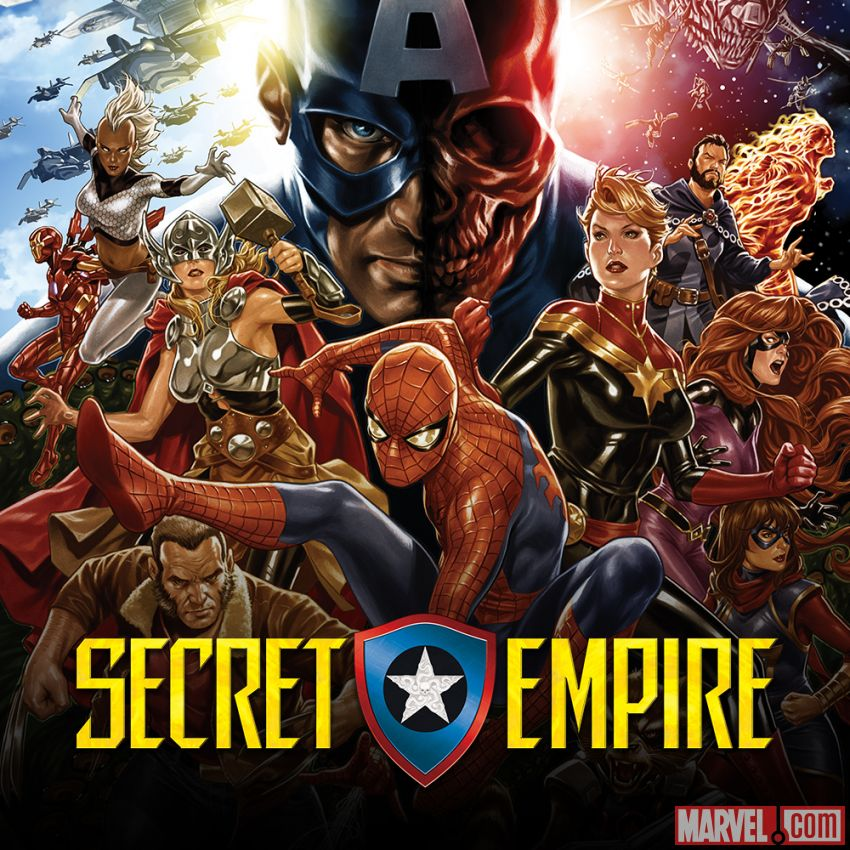

title: Secret Empire 
 id: 336 
 Description: Steve Rogers has gone rogue and taken over the United States! It's up to the united forces of the Avengers, the Champions, the X-Men and more to bring down one of their own in the nine-issue limited series written by Nick Spencer! 
----------------


In [3]:
limit = '100'
offset = 0
hero_id =  input("Hero's ID:")
# count = 1


md5key,ts = marvel.hashkey()
url =  "https://gateway.marvel.com:443/v1/public/characters/"\
       +hero_id+"/events?offset="+str(offset)+"&limit="+limit+"&ts="+ts+"&apikey="\
       +marvel.pbkey+"&hash="+md5key

print('Searching for events......\n')

hero_events = requests.get(url)
hero_events_j = json.loads(hero_events.text)

print('Events found:',hero_events_j['data']['total'])
print('Events got:',hero_events_j['data']['count'],'\n')

for events in hero_events_j['data']['results']:
    display(Image(str(events['thumbnail']['path'])+'.jpg'))
    print('title:',events['title'],'\n','id:',events['id'],'\n',\
          'Description:',events['description'],'\n----------------')
    